<a href="https://colab.research.google.com/github/PreetiRonghe/Datascience/blob/main/Forecasting_Data_Driven_Models_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: >

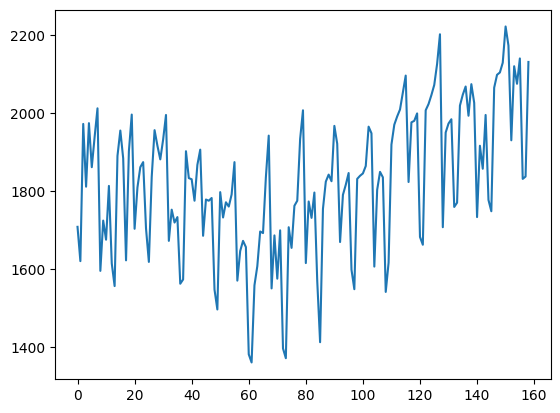

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

# Splitting data

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

# Moving Average

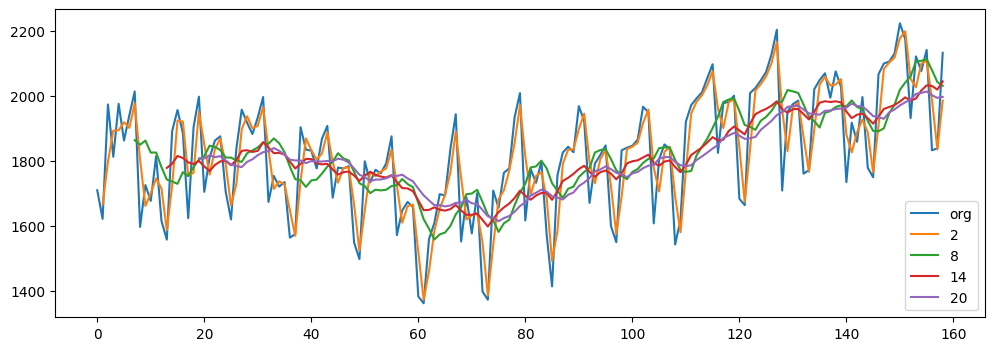

In [5]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
#Windowsize 2 with a Window size of 6, Rolling mean(Moving average)
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot


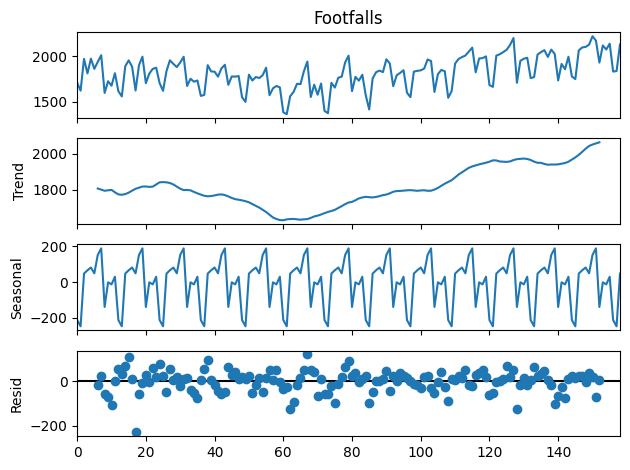

In [9]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
#changing the frequency to period
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


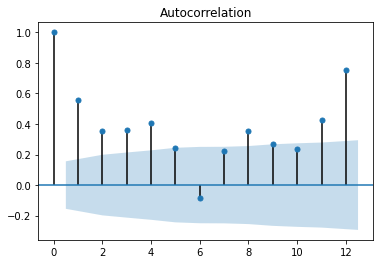

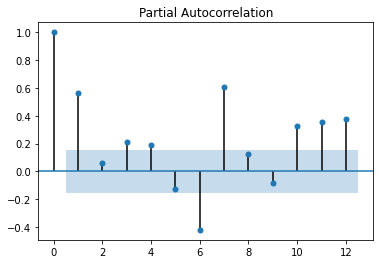

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [10]:
#mean Absolute percentage error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [12]:
Train["Footfalls"] = Train["Footfalls"].astype('double')
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls)
#Error

/tmp/ipython-input-3891027813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Footfalls"] = Train["Footfalls"].astype('double')
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


np.float64(8.490637057828376)

### Holt method

In [13]:
# Holt method
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls)

/tmp/ipython-input-1091197368.py:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


np.float64(7.546249229496056)

### Holts winter exponential smoothing with additive seasonality and additive trend


In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.159669764222986

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [14]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

np.float64(3.11853817101439)

## Final Model by combining train and test

In [15]:
Walmart["Footfalls"] = Walmart["Footfalls"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [16]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

,0
159,2156.844866
160,2188.391662
161,2147.233825
162,2264.165305
163,2306.031497
164,1932.294278
165,2098.784213
166,2084.898310
167,2136.805694
168,1857.939567
